# Tarea Regresión Lineal

In [1]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from random import random,randint,seed,sample
import matplotlib.pyplot as plt
import pandas as pda
import numpy as np
import scipy.stats
%matplotlib inline
seed(10)

In [2]:
def SimEcmBeta(coefs, xvec, yvec, step, rgs, coefid):
    ecmb= []
    brng = coefs[coefid][0]
    print(brng)
    if coefid == 0:
        bf = coefs[1][0]
    if coefid == 1:
        bf = coefs[0][0]
    valoresbetar = np.arange( brng-rgs, brng+rgs, step)
    for i in range(0, len(valoresbetar)):
        betar = valoresbetar[i]
        ecmb.append( np.mean(  (((bf + xvec*betar) - yvec )**2 ) )) 
    plt.scatter(valoresbetar, ecmb)

### RegLin 1

In [5]:
df1 = pda.DataFrame(pda.read_table("../datos_clase/regLin.csv", sep=",", header = 0))
x1 = df1[:][df1.columns[(0)]]
y1 = df1[:][df1.columns[1]]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.75)
x1_train = np.array(pda.DataFrame(x1_train))
y1_train = np.array(pda.DataFrame(y1_train))

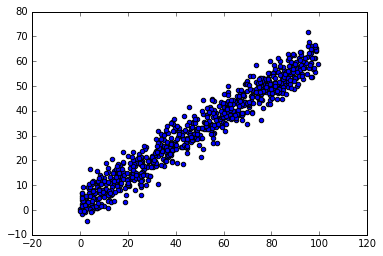

In [6]:
# 1. Gráfica
plt.scatter(x1_train, y1_train)

coeficientes [array([ 2.61079338]), array([[ 0.60456618]])]
ECM: 17.3557272662


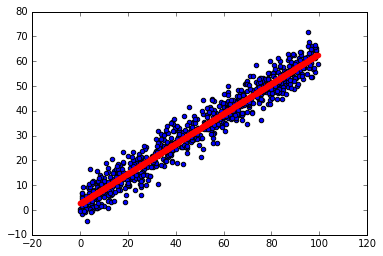

In [7]:
# 2. Regresión
regr1 = LinearRegression()
regr1.fit( x1_train, y1_train)
fittedvals1 = regr1.predict(x1_train)
residuales1 =(fittedvals1 - y1_train)
coefs1 = [regr1.intercept_, regr1.coef_]
print "coeficientes", coefs1
print "ECM:", np.mean(residuales1**2)
plt.scatter(x1_train, y1_train)
plt.scatter( x1_train, fittedvals1, color = 'red')

ECM: 15.7589718361


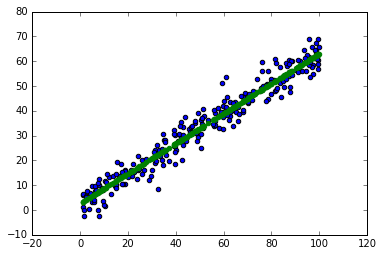

In [8]:
# 3. Prueba
x1_test = np.array(pda.DataFrame(x1_test))
y1_test = np.array(pda.DataFrame(y1_test))
fittedvalstest1 = regr1.predict(x1_test)
residualestest1 =(fittedvalstest1 - y1_test)
print "ECM:", np.mean(residualestest1**2)
plt.scatter(x1_test, y1_test)
plt.scatter(x1_test, fittedvalstest1, color = 'green')

2.61079338168


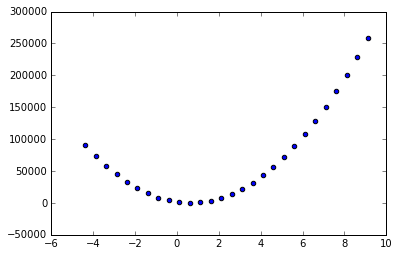

In [9]:
# 4. Simulación ECM
SimEcmBeta(coefs1, x1_test, y1_test, .5, 7, 0)

[ 0.60306396]


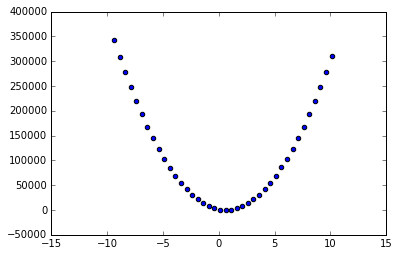

In [30]:
SimEcmBeta(coefs1, x1_test, y1_test, .5, 10, 1)

### RegLin 2

In [31]:
dat = pda.read_table("datos_clase/regLin2.csv", 
                    sep=",", header = 0)
df2 = pda.DataFrame(dat)
df2[:4][df2.columns]
x2 = df2[:][df2.columns[(0)]]
y2 = df2[:][df2.columns[1]]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.75)
x2_train = np.array(pda.DataFrame(x2_train))
y2_train = np.array(pda.DataFrame(y2_train))

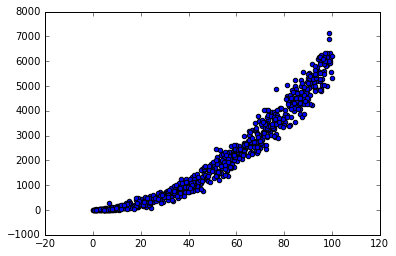

In [32]:
# 1. Gráfica
plt.scatter(x2_train, y2_train)

coeficientes [array([ 24.40018025]), array([[ 0.61221682]])]
ECM: 80510.6752154


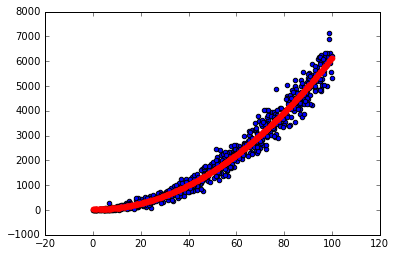

In [33]:
# 2. Regresión
regr2 = LinearRegression()
regr2.fit( x2_train**2, y2_train)
fittedvals2 = regr2.predict(x2_train**2)
residuales2 =(fittedvals2 - y2_train)
coefs2 = [regr2.intercept_, regr2.coef_]
print "coeficientes", coefs2
print "ECM:", np.mean(residuales2**2)
plt.scatter(x2_train, y2_train)
plt.scatter( x2_train, fittedvals2, color = 'red')

ECM: 73222.8681805


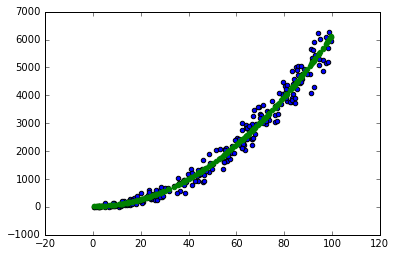

In [34]:
# 3. Prueba
x2_test = np.array(pda.DataFrame(x2_test))
y2_test = np.array(pda.DataFrame(y2_test))
fittedvalstest2 = regr2.predict(x2_test**2)
residualestest2 =(fittedvalstest2 - y2_test)
print "ECM:", np.mean(residualestest2**2)
plt.scatter(x2_test, y2_test)
plt.scatter(x2_test, fittedvalstest2, color = 'green')

[ 0.61221682]


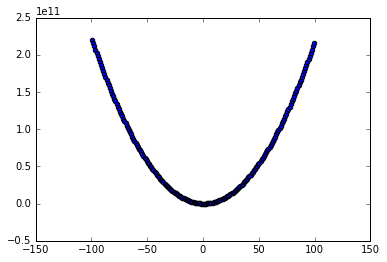

In [35]:
# 4. Simulación ECM
SimEcmBeta(coefs2, x2_test**2, y2_test, 1, 100, 1)

24.4001802506


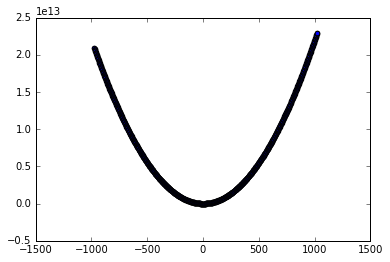

In [36]:
SimEcmBeta(coefs2, x2_test**2, y2_test, 2, 1000, 0)

### RegLin 3

In [37]:
df3 = pda.DataFrame(pda.read_table("datos_clase/regLin3.csv", 
                    sep=",", header = 0))
x3 = df3[:][df3.columns[(0)]]
y3 = df3[:][df3.columns[1]]
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, train_size=0.75)
x3_train = np.array(pda.DataFrame(x3_train))
y3_train = np.array(pda.DataFrame(y3_train))

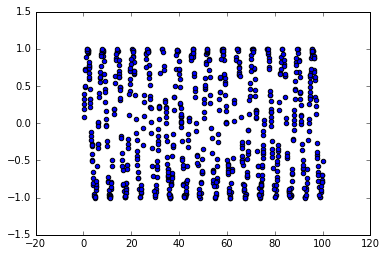

In [38]:
# 1. Gráfica
plt.scatter(x3_train, y3_train)

coeficientes [array([ -6.68798350e-13]), array([[ 1.]])]
ECM: 7978699.22413


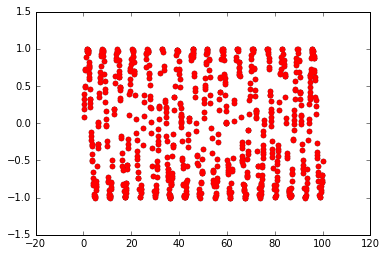

In [39]:
# 2. Regresión
regr3 = LinearRegression()
regr3.fit( np.sin(x3_train), y3_train)
fittedvals3 = regr3.predict(np.sin(x3_train))
residuales3 =(fittedvals3 - y2_train)
coefs3 = [regr3.intercept_, regr3.coef_]
print "coeficientes", coefs3
print "ECM:", np.mean(residuales3**2)
plt.scatter(x3_train, y3_train)
plt.scatter(x3_train, fittedvals3, color = 'red')

ECM: 4.185027744e-18


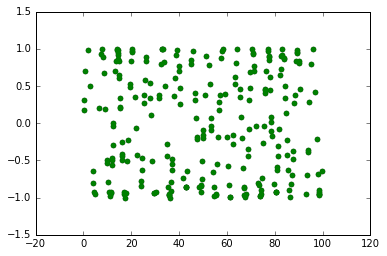

In [40]:
# 3. Prueba
x3_test = np.array(pda.DataFrame(x3_test))
y3_test = np.array(pda.DataFrame(y3_test))
fittedvalstest3 = regr3.predict( np.sin(x3_test) )
residualestest3 =(fittedvalstest3 - y3_test)
print "ECM:", np.mean(residualestest3**2)
plt.scatter(x3_test, y3_test)
plt.scatter(x3_test, fittedvalstest3, color = 'green')

-6.68798350034e-13


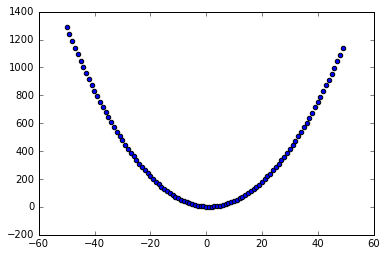

In [41]:
# 4. Simulación ECM
SimEcmBeta(coefs3, np.sin(x3_test), y3_test, 1, 50, 0)

[ 1.]


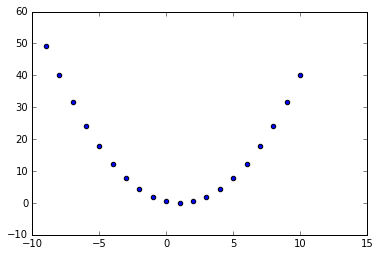

In [42]:
SimEcmBeta(coefs3, np.sin(x3_test), y3_test, 1, 10, 1)